In [7]:
pip install keras tensorflow

  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.7/252.7 MB 7.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 23.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 27.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 25.0 MB/s eta 0:00:00a 0:00:01
Using cached termcolor-3.1.0-py3-none-any.whl (7.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f'Train data shape: {x_train.shape}')
print(f'Test data shape: {x_test.shape}')
print(f'Train labels shape: {y_train.shape}')
print(f'Test labels shape: {y_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step 
Train data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Train labels shape: (60000,)
Test labels shape: (10000,)


In [11]:
from sklearn.model_selection import train_test_split

# Selecionar 10% dos conjuntos de forma estratificada
x_train, _, y_train, _ = train_test_split(x_train, y_train, test_size=0.9, stratify=y_train, random_state=42)
x_test, _, y_test, _ = train_test_split(x_test, y_test, test_size=0.9, stratify=y_test, random_state=42)

print(f'Train data shape: {x_train.shape}')
print(f'Test data shape: {x_test.shape}')
print(f'Train labels shape: {y_train.shape}')
print(f'Test labels shape: {y_test.shape}')

Train data shape: (6000, 28, 28)
Test data shape: (1000, 28, 28)
Train labels shape: (6000,)
Test labels shape: (1000,)


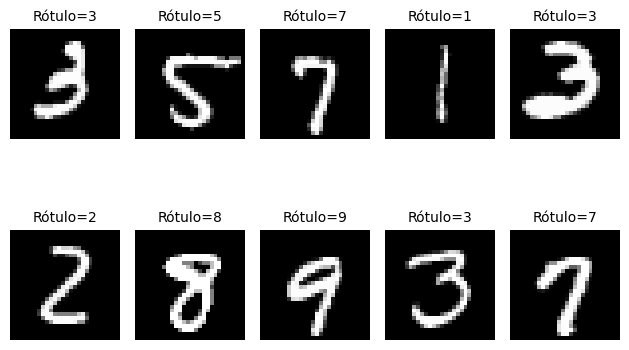

In [13]:
import matplotlib.pyplot as plt

for i in range(10):
  image = x_test[i]
  true_label = y_test[i]

  plt.subplot(2, 5, i + 1)
  plt.imshow(image, cmap='gray')
  plt.title(f'Rótulo={true_label}', fontsize=10)
  plt.axis('off')
plt.tight_layout()
plt.show()

In [15]:
import numpy as np

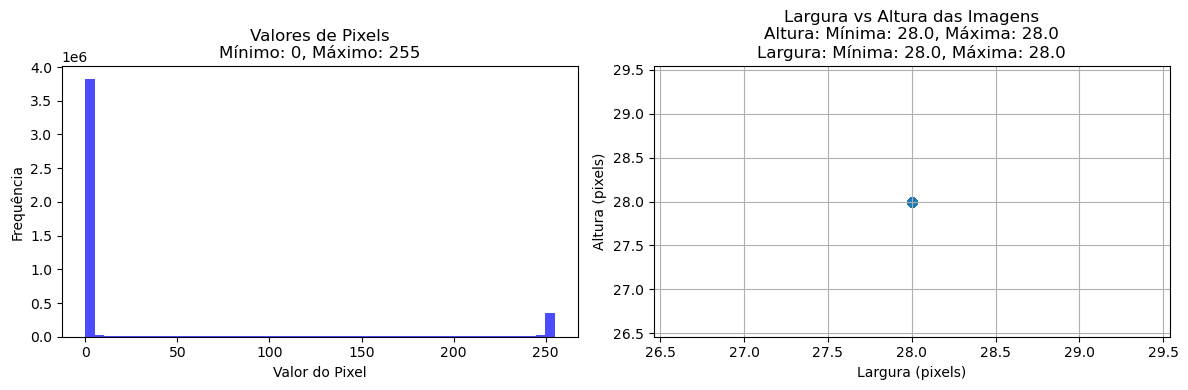

In [17]:
pixel_min = np.min(x_train)
pixel_max = np.max(x_train)

image_heights = x_train.shape[1] * np.ones(x_train.shape[0])
image_widths = x_train.shape[2] * np.ones(x_train.shape[0])

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(x_train.flatten(), bins=50, color='blue', alpha=0.7)
plt.title(f'Valores de Pixels\nMínimo: {pixel_min}, Máximo: {pixel_max}')
plt.xlabel('Valor do Pixel')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.scatter(image_widths, image_heights, alpha=0.5)
plt.title(f'Largura vs Altura das Imagens\nAltura: Mínima: {image_heights.min()}, Máxima: {image_heights.max()}\nLargura: Mínima: {image_widths.min()}, Máxima: {image_widths.max()}')
plt.xlabel('Largura (pixels)')
plt.ylabel('Altura (pixels)')
plt.grid(True)

plt.tight_layout()
plt.show()

## Análise das Imagens

In [20]:
train_unique_values, train_counts = np.unique(y_train, return_counts=True)
print("Valores únicos:", train_unique_values)
print("Contagens:", train_counts)

Valores únicos: [0 1 2 3 4 5 6 7 8 9]
Contagens: [592 674 596 613 584 542 592 627 585 595]


In [22]:
test_unique_values, test_counts = np.unique(y_test, return_counts=True)
print("Valores únicos:", test_unique_values)
print("Contagens:", test_counts)

Valores únicos: [0 1 2 3 4 5 6 7 8 9]
Contagens: [ 98 114 103 101  98  89  96 103  97 101]


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

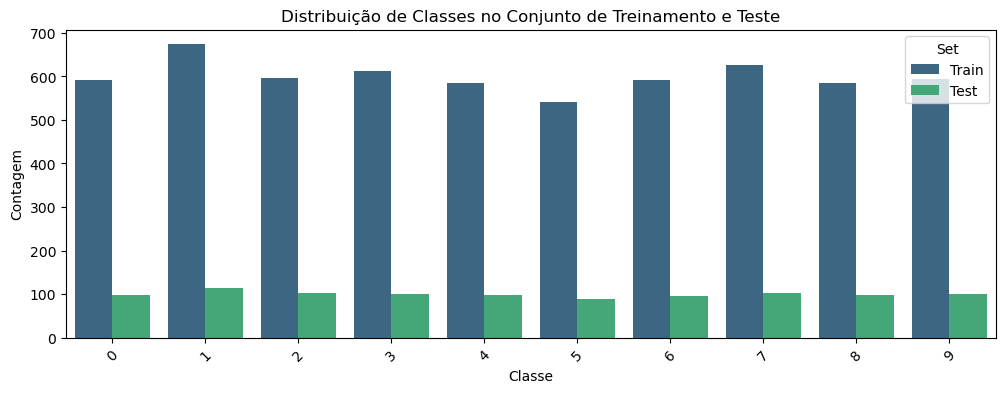

In [26]:
# Criar DataFrames para facilitar a plotagem com seaborn
train_df = pd.DataFrame({
    'Class': train_unique_values,
    'Count': train_counts,
    'Set': 'Train'
})

test_df = pd.DataFrame({
    'Class': test_unique_values,
    'Count': test_counts,
    'Set': 'Test'
})

# Combinar os DataFrames de treinamento e teste
combined_df = pd.concat([train_df, test_df])

# Plotar a distribuição das classes no conjunto de treinamento e teste
plt.figure(figsize=(12, 4))
sns.barplot(x='Class', y='Count', hue='Set', data=combined_df, palette='viridis')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.title('Distribuição de Classes no Conjunto de Treinamento e Teste')
plt.xticks(rotation=45)
plt.show()

## Vetorizar as Imagens e Treinar um Modelo SVM

In [29]:
x_train.shape

(6000, 28, 28)

In [31]:
# Vetorizar as imagens
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

In [33]:
x_train_flat.shape

(6000, 784)

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, confusion_matrix

# Treinar o modelo SVM
svm = SVC(probability=True)
svm.fit(x_train_flat, y_train)

# Inferir
y_pred = svm.predict(x_test_flat)

Acurácia: 0.961
Kappa: 0.9566459048722221
F1 score: 0.9610650779699714


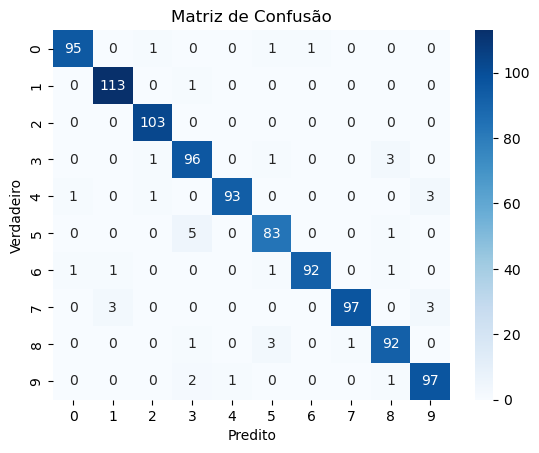

In [54]:
def evaluate(y_test, y_pred):

  # Métricas
  print('Acurácia:', accuracy_score(y_test, y_pred))
  print('Kappa:', cohen_kappa_score(y_test, y_pred))
  print('F1 score:', f1_score(y_test, y_pred, average='weighted'))

  # Plotar matriz de confusão
  conf_matrix = confusion_matrix(y_test, y_pred)

  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
  plt.title('Matriz de Confusão')
  plt.xlabel('Predito')
  plt.ylabel('Verdadeiro')
  plt.show()

evaluate(y_test, y_pred)

## Análise dos Erros

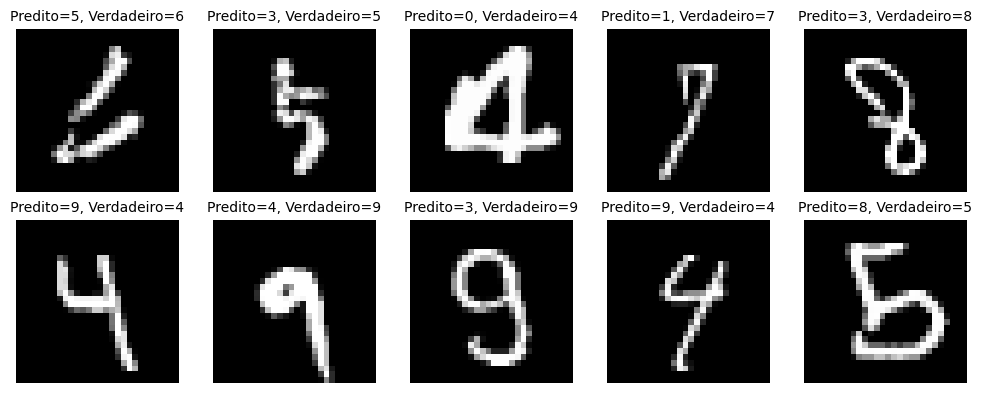

In [40]:
# Filtrar previsões incorretas
incorrect_indices = np.where(y_pred != y_test)[0]

# Se houver previsões incorretas, selecione até 10 para exibir
num_images_to_show = min(10, len(incorrect_indices))
if num_images_to_show > 0:
    plt.figure(figsize=(10, 4))
    for i in range(num_images_to_show):
        incorrect_index = incorrect_indices[i]
        incorrect_image = x_test[incorrect_index]
        true_label = y_test[incorrect_index]
        predicted_label = y_pred[incorrect_index]

        plt.subplot(2, 5, i + 1)
        plt.imshow(incorrect_image, cmap='gray')
        plt.title(f'Predito={predicted_label}, Verdadeiro={true_label}', fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("Nenhuma previsão incorreta encontrada.")

## Analisar Probabilities

In [42]:
# Criar DataFrame com informações das previsões incorretas
incorrect_predictions = []
probabilities = svm.predict_proba(x_test_flat)

for i in incorrect_indices:
    true_label = y_test[i]
    predicted_label = y_pred[i]
    row = {
        'indice': i,
        'true': true_label,
        'pred': predicted_label
    }
    # Adicionar as probabilidades para cada classe
    for class_index in range(10):
        row[f'proba_{class_index}'] = probabilities[i, class_index]
    incorrect_predictions.append(row)

df_incorrect_predictions = pd.DataFrame(incorrect_predictions)

# Exibir o DataFrame
df_incorrect_predictions.head(10)

,indice,true,pred,proba_0,proba_1,proba_2,proba_3,proba_4,proba_5,proba_6,proba_7,proba_8,proba_9
0,45,6,5,0.086166,0.008382,0.023069,0.114957,0.001101,0.421225,0.340106,0.001812,0.001866,0.001316
1,48,5,3,0.000843,0.009630,0.002707,0.677949,0.047791,0.164804,0.005476,0.013589,0.042275,0.034934
2,56,4,0,0.597066,0.001676,0.066128,0.005657,0.073062,0.103897,0.117743,0.002805,0.011794,0.020172
3,61,7,1,0.003833,0.509001,0.031409,0.029554,0.002671,0.035599,0.001947,0.321637,0.025806,0.038542
4,69,8,3,0.006254,0.013363,0.096848,0.278312,0.131650,0.055116,0.010477,0.044324,0.132981,0.230676
5,95,4,9,0.000158,0.001989,0.000779,0.012818,0.295216,0.012510,0.000683,0.001413,0.008603,0.665831
6,125,9,4,0.000260,0.000463,0.000151,0.003076,0.565925,0.038857,0.000758,0.010646,0.001887,0.377976
7,142,9,3,0.022898,0.007050,0.023184,0.233880,0.025702,0.066239,0.006832,0.046299,0.221327,0.346588
8,180,4,9,0.000226,0.000370,0.000622,0.001847,0.202977,0.003579,0.000204,0.024379,0.001259,0.764538
9,183,5,8,0.000836,0.000503,0.027481,0.018147,0.000711,0.044776,0.007263,0.000181,0.899338,0.000764


In [44]:
# Aplica um gradiente de cores a todas as colunas a partir da quarta (índice 3)
styled_df = df_incorrect_predictions.head(10).style.background_gradient(cmap='Oranges', subset=df_incorrect_predictions.columns[3:])
styled_df

,indice,true,pred,proba_0,proba_1,proba_2,proba_3,proba_4,proba_5,proba_6,proba_7,proba_8,proba_9
0,45,6,5,0.086166,0.008382,0.023069,0.114957,0.001101,0.421225,0.340106,0.001812,0.001866,0.001316
1,48,5,3,0.000843,0.009630,0.002707,0.677949,0.047791,0.164804,0.005476,0.013589,0.042275,0.034934
2,56,4,0,0.597066,0.001676,0.066128,0.005657,0.073062,0.103897,0.117743,0.002805,0.011794,0.020172
3,61,7,1,0.003833,0.509001,0.031409,0.029554,0.002671,0.035599,0.001947,0.321637,0.025806,0.038542
4,69,8,3,0.006254,0.013363,0.096848,0.278312,0.131650,0.055116,0.010477,0.044324,0.132981,0.230676
5,95,4,9,0.000158,0.001989,0.000779,0.012818,0.295216,0.012510,0.000683,0.001413,0.008603,0.665831
6,125,9,4,0.000260,0.000463,0.000151,0.003076,0.565925,0.038857,0.000758,0.010646,0.001887,0.377976
7,142,9,3,0.022898,0.007050,0.023184,0.233880,0.025702,0.066239,0.006832,0.046299,0.221327,0.346588
8,180,4,9,0.000226,0.000370,0.000622,0.001847,0.202977,0.003579,0.000204,0.024379,0.001259,0.764538
9,183,5,8,0.000836,0.000503,0.027481,0.018147,0.000711,0.044776,0.007263,0.000181,0.899338,0.000764


## Normalização das Imagens e Retreinamento

In [48]:
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

In [50]:
# Vetorizar as imagens
x_train_flat = x_train_normalized.reshape(x_train_normalized.shape[0], -1)
x_test_flat = x_test_normalized.reshape(x_test_normalized.shape[0], -1)

Acurácia: 0.961
Kappa: 0.9566459048722221
F1 score: 0.9610650779699714


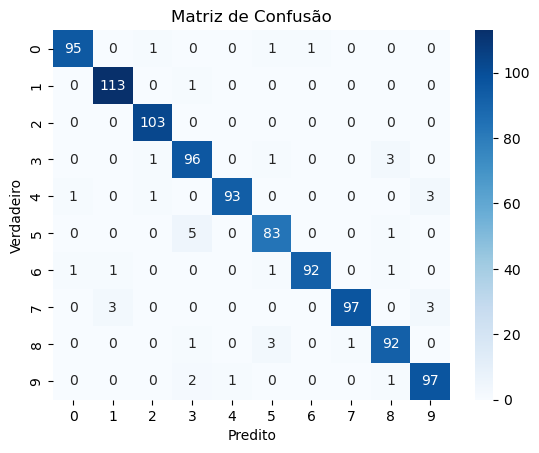

In [56]:
# Treinar o modelo SVM
svm = SVC(probability=True)
svm.fit(x_train_flat, y_train.flatten())

# Fazer previsões e avaliar o modelo
y_pred = svm.predict(x_test_flat)
evaluate(y_test, y_pred)

## PCA para Redução de Dimensionalidade e Retreinamento

In [57]:
from sklearn.decomposition import PCA

n_components = 100
pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

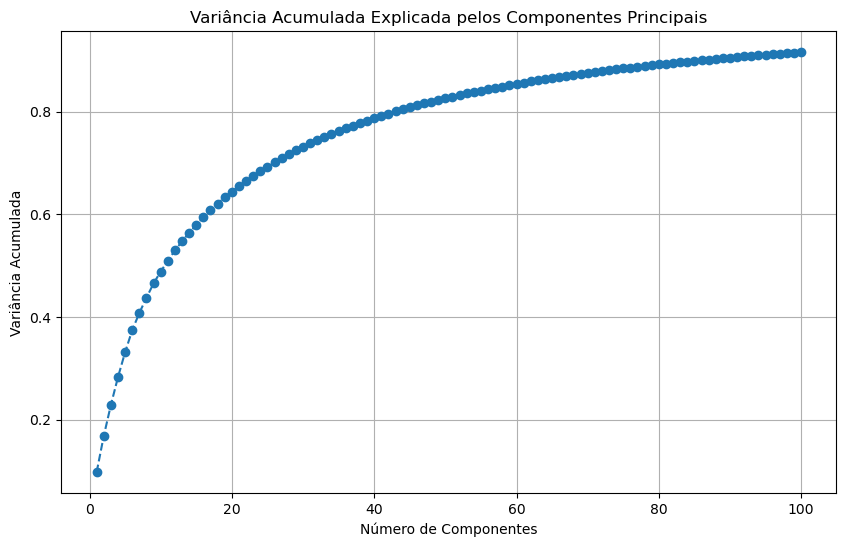

In [58]:
# Plotar variância acumulada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Acumulada')
plt.title('Variância Acumulada Explicada pelos Componentes Principais')
plt.grid(True)

Acurácia: 0.966
Kappa: 0.9622044163027915
F1 score: 0.9659952916344544


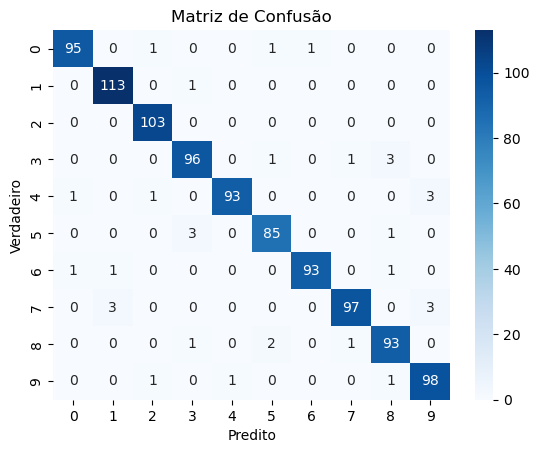

In [59]:
# Treinar o modelo SVM
x_train_flat = x_train_pca.reshape(x_train_pca.shape[0], -1)
x_test_flat = x_test_pca.reshape(x_test_pca.shape[0], -1)

svm = SVC(probability=True)
svm.fit(x_train_flat, y_train.flatten())

# Fazer previsões e avaliar o modelo
y_pred = svm.predict(x_test_flat)
evaluate(y_test, y_pred)

## Aplicação de CLAHE e Retreino

In [67]:
import cv2

# Função para aplicar CLAHE
def apply_clahe(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    image_clahe = clahe.apply(image)
    return image_clahe

# Aplicar CLAHE em um subconjunto de treinamento e teste para exemplo
x_train_clahe = np.array([apply_clahe(img) for img in x_train])
x_test_clahe = np.array([apply_clahe(img) for img in x_test])

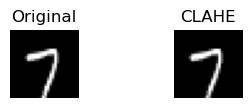

In [69]:
# Plotar a imagem original e a imagem com CLAHE aplicados lado a lado
plt.figure(figsize=(3, 3))
image_idx = 10  # Substitua pelo índice da imagem que deseja visualizar

# Imagem original
plt.subplot(1, 3, 1)
plt.imshow(x_train[image_idx], cmap='gray')
plt.title('Original')
plt.axis('off')

# Imagem com CLAHE aplicado
plt.subplot(1, 3, 3)
plt.imshow(x_train_clahe[image_idx], cmap='gray')
plt.title('CLAHE')
plt.axis('off')

plt.show()

Acurácia: 0.964
Kappa: 0.9599815915321048
F1 score: 0.9640317487421942


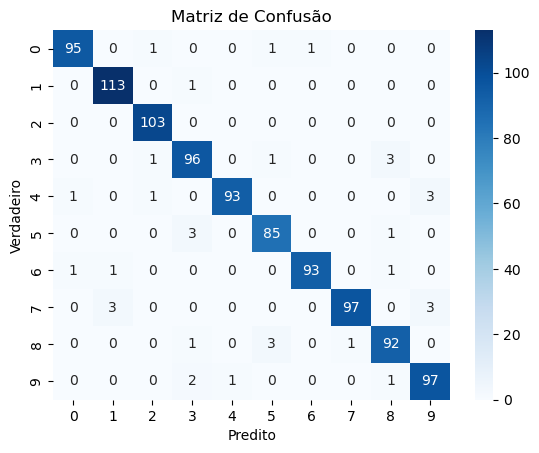

In [71]:
x_train_flat = x_train_clahe.reshape(x_train_clahe.shape[0], -1)
x_test_flat = x_test_clahe.reshape(x_test_clahe.shape[0], -1)

# Treinar o modelo SVM
svm = SVC(probability=True)
svm.fit(x_train_flat, y_train.flatten())

# Fazer previsões e avaliar o modelo
y_pred = svm.predict(x_test_flat)
evaluate(y_test, y_pred)